# Phase Portrait Plotter

## Introduction

This repository provides a general framework to visualize the phase portrait of a 2D dynamical system.

The program:

1. Computes and plots **fixed points**.
2. Computes and plots **nullclines**.
3. Plots the **vector field**.
4. Simulates and plots **N random trajectories**.

The user can input any **2D dynamical system**.

## Defining a System

A 2D dynamical system is described by:

$\frac{dx}{dt} = f(x, y)$,  $\frac{dy}{dt} = g(x, y)$

where $f(x, y)$ and $g(x, y)$ define the evolution of the system.

### Example: Van der Pol Oscillator

The **Van der Pol oscillator** is a nonlinear system described by:

$\frac{dx}{dt} = y$, $\frac{dy}{dt} = \mu (1 - x^2) y - x$

where $\mu$ is a nonlinearity parameter.

```python
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from scipy.optimize import fsolve

def vdp(t, Y, mu=1.0):
    """Defines the Van der Pol oscillator system.
    
    Parameters:
    t : float
        Time variable (not used in autonomous systems but required by solvers).
    Y : list or array
        A list containing state variables [x, y].
    mu : float, optional
        Nonlinearity parameter (default is 1.0).
    
    Returns:
    np.array
        Array containing derivatives [dx/dt, dy/dt].
    """
    x, y = Y
    dxdt = y
    dydt = mu * (1 - x**2) * y - x
    return np.array([dxdt, dydt])
```

## Finding Fixed Points

Fixed points (or equilibrium points) satisfy:

$f(x, y) = 0$, $g(x, y) = 0$

The function below finds these points numerically:

```python
def find_fixed_points(f, x_range, y_range):
    """Finds the fixed points of the system by solving dx/dt = 0 and dy/dt = 0.
    
    Parameters:
    f : function
        The function representing the system.
    x_range, y_range : tuple
        Ranges to search for fixed points.
    
    Returns:
    np.array
        Array containing fixed points.
    """
    fixed_points = []
    for x in np.linspace(*x_range, 10):
        for y in np.linspace(*y_range, 10):
            root, info, ier, _ = fsolve(lambda Y: f(0, Y), [x, y], full_output=True)
            if ier == 1 and np.allclose(f(0, root), [0, 0], atol=1e-6):
                fixed_points.append(tuple(root))
    return np.unique(fixed_points, axis=0)
```

## Computing Nullclines

Nullclines are the curves where either $\frac{dx}{dt} = 0$ or $\frac{dy}{dt} = 0$.

```python
def compute_nullclines(f, x_range, y_range, res=100):
    """Computes the nullclines where dx/dt = 0 and dy/dt = 0.
    
    Parameters:
    f : function
        The function representing the system.
    x_range, y_range : tuple
        Ranges of x and y.
    res : int
        Resolution of the meshgrid.
    
    Returns:
    tuple
        Meshgrid values and nullcline evaluations.
    """
    x_vals = np.linspace(*x_range, res)
    y_vals = np.linspace(*y_range, res)
    X, Y = np.meshgrid(x_vals, y_vals)
    U, V = np.zeros_like(X), np.zeros_like(Y)
    for i in range(X.shape[0]):
        for j in range(X.shape[1]):
            U[i, j], V[i, j] = f(0, [X[i, j], Y[i, j]])
    return X, Y, U, V
```

## Plotting the Phase Portrait

```python
def plot_phase_portrait(f, x_range=(-2, 2), y_range=(-2, 2), N=10, T=10, mu=1.0):
    """Plots the phase portrait of a given 2D dynamical system.
    
    Parameters:
    f : function
        The function representing the system.
    x_range, y_range : tuple, optional
        Ranges of x and y axes.
    N : int, optional
        Number of trajectories to plot.
    T : float, optional
        Maximum integration time (default is 10).
    mu : float, optional
        Parameter for the Van der Pol oscillator (default is 1.0).
    """
    fig, ax = plt.subplots(figsize=(8, 6))
    
    X, Y, U, V = compute_nullclines(f, x_range, y_range)
    ax.contour(X, Y, U, levels=[0], colors='r', linestyles='dashed')
    ax.contour(X, Y, V, levels=[0], colors='b', linestyles='dashed')
    
    x_vals = np.linspace(*x_range, 20)
    y_vals = np.linspace(*y_range, 20)
    X, Y = np.meshgrid(x_vals, y_vals)
    DX, DY = np.zeros_like(X), np.zeros_like(Y)
    for i in range(X.shape[0]):
        for j in range(X.shape[1]):
            DX[i, j], DY[i, j] = f(0, [X[i, j], Y[i, j]])
    M = np.hypot(DX, DY)
    DX, DY = DX/M, DY/M
    ax.quiver(X, Y, DX, DY, color='gray', alpha=0.6)
    
    num_points = int(20 * T)
    for _ in range(N):
        x0, y0 = np.random.uniform(*x_range), np.random.uniform(*y_range)
        sol = solve_ivp(f, [0, T], [x0, y0], t_eval=np.linspace(0, T, num_points))
        ax.plot(sol.y[0], sol.y[1], 'k-', alpha=0.7)
    
    fixed_points = find_fixed_points(f, x_range, y_range)
    if fixed_points.size:
        ax.plot(fixed_points[:, 0], fixed_points[:, 1], 'go', markersize=8, label='Fixed Points')
    
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_xlim(x_range)
    ax.set_ylim(y_range)
    ax.set_title("Phase Portrait")
    ax.legend()
    plt.show()

plot_phase_portrait(lambda t, Y: vdp(t, Y, mu=1.0), x_range=(-3, 3), y_range=(-3, 3), N=10, T=10)
```



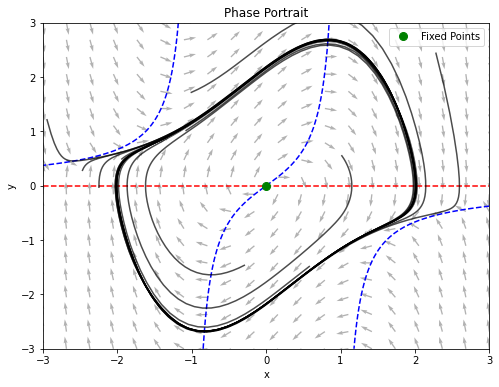

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from scipy.optimize import fsolve

def vdp(t, Y, mu=1.0):
    """Defines the Van der Pol oscillator system."""
    x, y = Y
    dxdt = y
    dydt = mu * (1 - x**2) * y - x
    return np.array([dxdt, dydt])

def find_fixed_points(f, x_range, y_range):
    """Finds the fixed points of the system."""
    fixed_points = []
    for x in np.linspace(*x_range, 10):
        for y in np.linspace(*y_range, 10):
            root, info, ier, _ = fsolve(lambda Y: f(0, Y), [x, y], full_output=True)
            if ier == 1 and np.allclose(f(0, root), [0, 0], atol=1e-6):
                fixed_points.append(tuple(root))
    return np.unique(fixed_points, axis=0)

def compute_nullclines(f, x_range, y_range, res=100):
    """Computes the nullclines where dx/dt = 0 and dy/dt = 0."""
    x_vals = np.linspace(*x_range, res)
    y_vals = np.linspace(*y_range, res)
    X, Y = np.meshgrid(x_vals, y_vals)
    U, V = np.zeros_like(X), np.zeros_like(Y)
    for i in range(X.shape[0]):
        for j in range(X.shape[1]):
            U[i, j], V[i, j] = f(0, [X[i, j], Y[i, j]])
    return X, Y, U, V

def plot_phase_portrait(f, x_range=(-2, 2), y_range=(-2, 2), N=10, T=10, mu=1.0):
    """Plots the phase portrait of a given 2D dynamical system."""
    fig, ax = plt.subplots(figsize=(8, 6))
    
    X, Y, U, V = compute_nullclines(f, x_range, y_range)
    ax.contour(X, Y, U, levels=[0], colors='r', linestyles='dashed')
    ax.contour(X, Y, V, levels=[0], colors='b', linestyles='dashed')
    
    x_vals = np.linspace(*x_range, 20)
    y_vals = np.linspace(*y_range, 20)
    X, Y = np.meshgrid(x_vals, y_vals)
    DX, DY = np.zeros_like(X), np.zeros_like(Y)
    for i in range(X.shape[0]):
        for j in range(X.shape[1]):
            DX[i, j], DY[i, j] = f(0, [X[i, j], Y[i, j]])
    M = np.hypot(DX, DY)
    DX, DY = DX/M, DY/M
    ax.quiver(X, Y, DX, DY, color='gray', alpha=0.6)
    
    num_points = int(20 * T)
    for _ in range(N):
        x0, y0 = np.random.uniform(*x_range), np.random.uniform(*y_range)
        sol = solve_ivp(f, [0, T], [x0, y0], t_eval=np.linspace(0, T, num_points))
        ax.plot(sol.y[0], sol.y[1], 'k-', alpha=0.7)
    
    fixed_points = find_fixed_points(f, x_range, y_range)
    if fixed_points.size:
        ax.plot(fixed_points[:, 0], fixed_points[:, 1], 'go', markersize=8, label='Fixed Points')
    
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_xlim(x_range)
    ax.set_ylim(y_range)
    ax.set_title("Phase Portrait")
    ax.legend()
    plt.show()

plot_phase_portrait(lambda t, Y: vdp(t, Y, mu=1.0), x_range=(-3, 3), y_range=(-3, 3), N=10, T=10)


<ipython-input-1-7fc9fff221e9>:50: RuntimeWarning: invalid value encountered in divide
  DX, DY = DX/M, DY/M


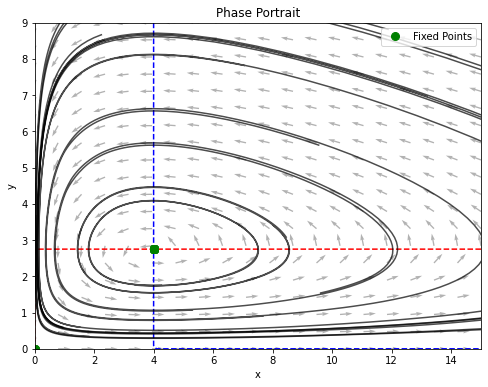

In [10]:
def lotka_volterra(t, Y, alpha=1.1, beta=0.4, delta=0.1, gamma=0.4):
    x, y = Y
    dxdt = alpha * x - beta * x * y
    dydt = delta * x * y - gamma * y
    return np.array([dxdt, dydt])

plot_phase_portrait(lambda t, Y: lotka_volterra(t, Y), x_range=(0, 15), y_range=(0, 9), N=10, T=20)

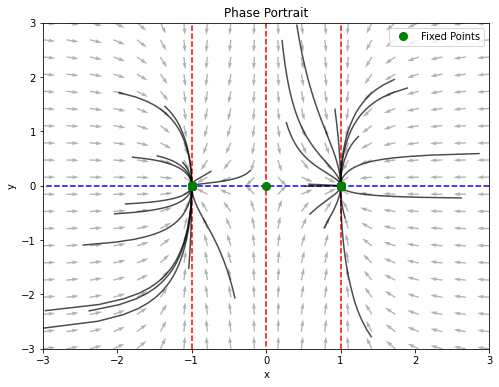

In [13]:
def exercise_06_01_02(t, Y, alpha=1.1, beta=0.4, delta=0.1, gamma=0.4):
    x, y = Y
    dxdt = x - x**3
    dydt =  -y
    return np.array([dxdt, dydt])

plot_phase_portrait(lambda t, Y: exercise_06_01_02(t, Y), x_range=(-3, 3), y_range=(-3, 3), N=30, T=50)